# 2) Plot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a new dataframe
df = pd.read_csv(r'C:\Users\navee\CapitalOne_Coding\finaldataset1.csv')


In [7]:
df

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchingCVV
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,PURCHASE,0.00,0,0,0,1
1,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,PURCHASE,0.00,1,0,0,1
2,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
3,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,PURCHASE,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,PURCHASE,1095.04,0,0,0,1
786359,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,PURCHASE,1214.96,0,0,0,1
786360,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,PURCHASE,1233.85,0,0,0,1
786361,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,PURCHASE,1283.28,0,0,0,1


Capital One provides 10 different Credit Limits to its customers starting from 250  to $20000.

In [10]:
df.creditLimit.unique() # Credit Limit types

array([ 5000.,  2500., 50000., 15000., 10000.,   250.,   500.,  1000.,
        7500., 20000.])

Capital One offers 5000, 15000 or 7500 as credit limit to its customers mostly.

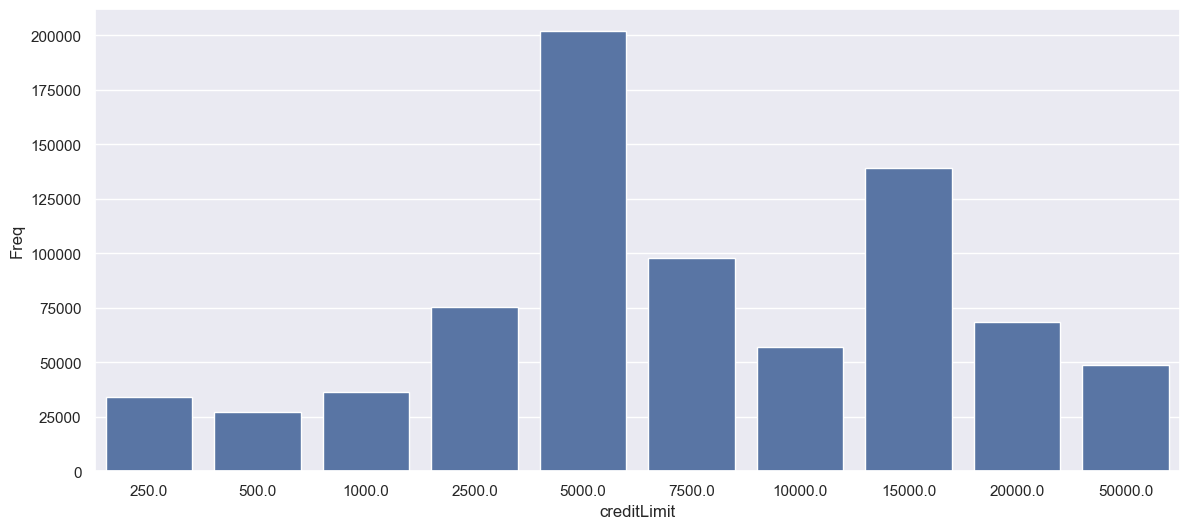

In [13]:
z=pd.DataFrame(df.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
z.columns=['creditLimit','Freq'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="creditLimit", y="Freq", data=z) # draw barplot

There are 12417 fraudulent cases among all population.

In [16]:
df['isFraud'].value_counts() # distribution of fraud vs non-fraud cases

isFraud
0    773946
1     12417
Name: count, dtype: int64

Ratio of fraudulent cases to all population is 1.58 % so the dataset is highly imbalanced.

C:\Users\navee\AppData\Local\Temp\ipykernel_22744\2996298398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="Blues_d")


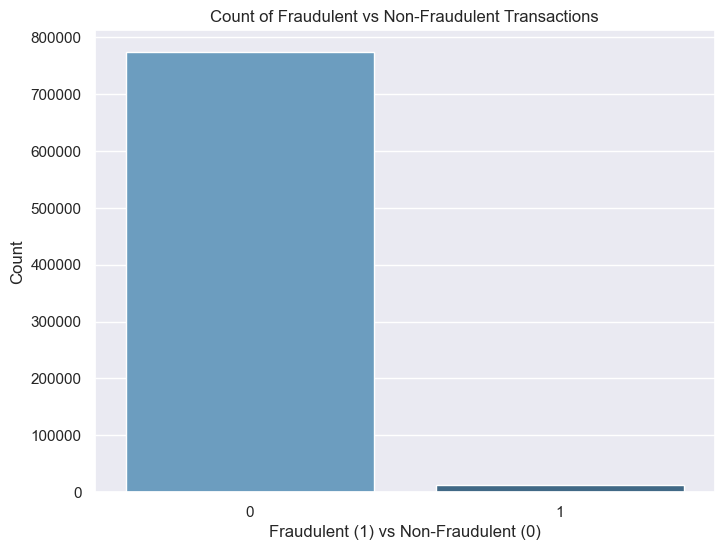

In [19]:
# Count of 'isFraud' values
fraud_counts = df['isFraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="Blues_d")

# Add labels and title
plt.title("Count of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Fraudulent (1) vs Non-Fraudulent (0)")
plt.ylabel("Count")

# Show the plot
plt.show()

There are 19 merchant categories such as rideshare, auto,hotels and fastfood.

In [22]:
df['merchantCategoryCode'].unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [24]:
df['merchantCategoryCode'].nunique()

19

Top 3 categories are online, fastfood and entertainment in terms of the number of transactions.

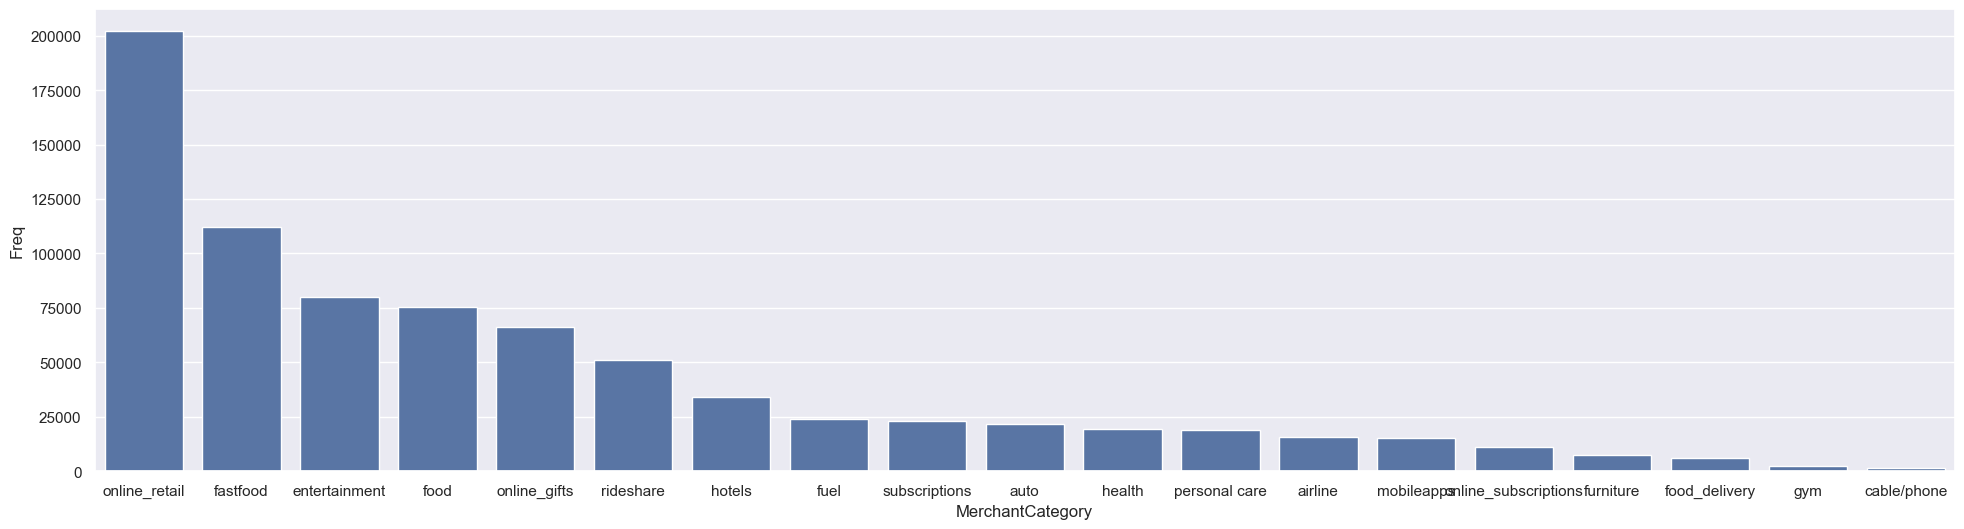

In [27]:
t=pd.DataFrame(df['merchantCategoryCode'].value_counts()).reset_index(drop=False)
t.columns=['MerchantCategory','Freq'] # rename columns
plt.figure(figsize=(24,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="MerchantCategory", y="Freq", data=t) # draw barplot

The dataset includes transactions in 4 countries such as US, Canada, Mexico and Puerto Rico.

In [30]:
df.acqCountry.unique()

array(['US', nan, 'CAN', 'MEX', 'PR'], dtype=object)

In [32]:
df.merchantCountryCode.unique()

array(['US', 'CAN', nan, 'PR', 'MEX'], dtype=object)

In [34]:
df.acqCountry.value_counts()

acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64

There are 3 different transaction types such as Purchase, Address Verification and Reversal. Also, it includes some Null values in that feature.

In [37]:
df['transactionType'].unique() # list of transaction type categories

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', nan], dtype=object)

In [39]:
e=pd.DataFrame(df.transactionType.value_counts()).reset_index(drop=False)
e

,transactionType,count
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


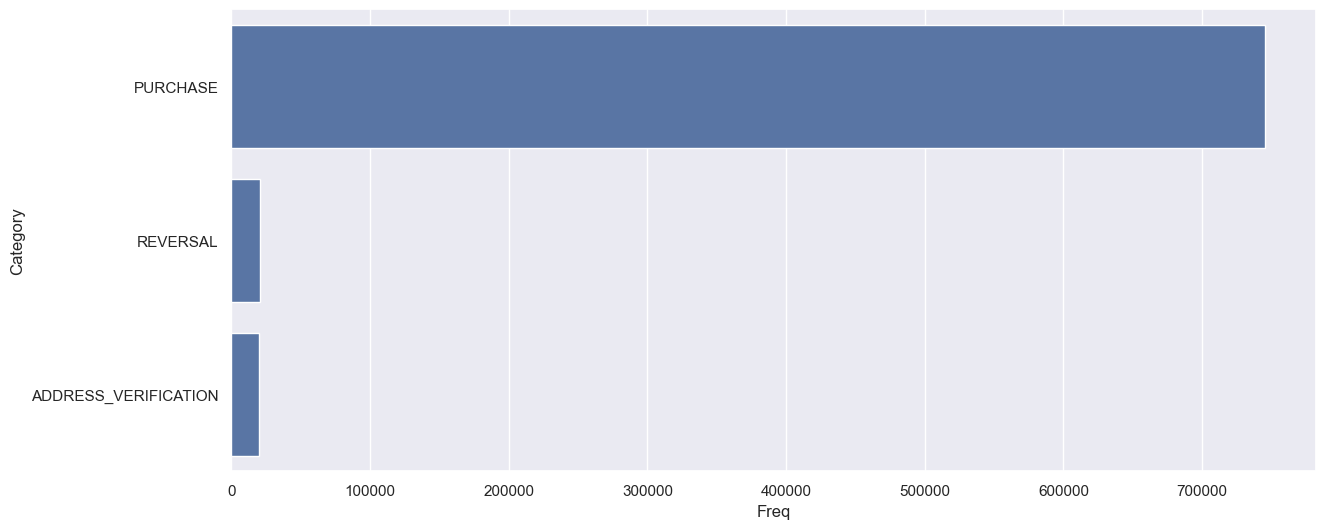

In [41]:
e=pd.DataFrame(df.transactionType.value_counts()).reset_index(drop=False)
e.columns=['Category','Freq'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Freq", y="Category", data=e) # draw barplot

I created 'Date' column by splitting original 'TransactionDate' column.The dataset obtains transactions in year 2016.

In [44]:
df['Date']=df['transactionDateTime'].apply(lambda x: x.split('T')[0]) # create 'Date' column

In [48]:
# Dataset includes all transactions during year 2016
df.transactionDateTime.min() # Start point: 2016-01-01 T 00:01:02

'2016-01-01T00:01:02'

In [52]:
df.transactionDateTime.max() # End point:   2016-12-30 T 23:59:45

'2016-12-30T23:59:45'

I checked the key statistics of transaction amounts. Maximum transaction amount was $2011. Also, average of transaction amount is 136.98 standard deviation of transaction amount was 147.72.

In [55]:
df.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

I plotted the transactions amounts by applying histogram. This shows that there is right skewed (positive skewness) distribution. Avg. of transaction amounts (136.98) is much higher than median of transaction amounts (87.90)

C:\Users\navee\AppData\Local\Temp\ipykernel_22744\2242476397.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.transactionAmount)


<Axes: xlabel='transactionAmount', ylabel='Density'>

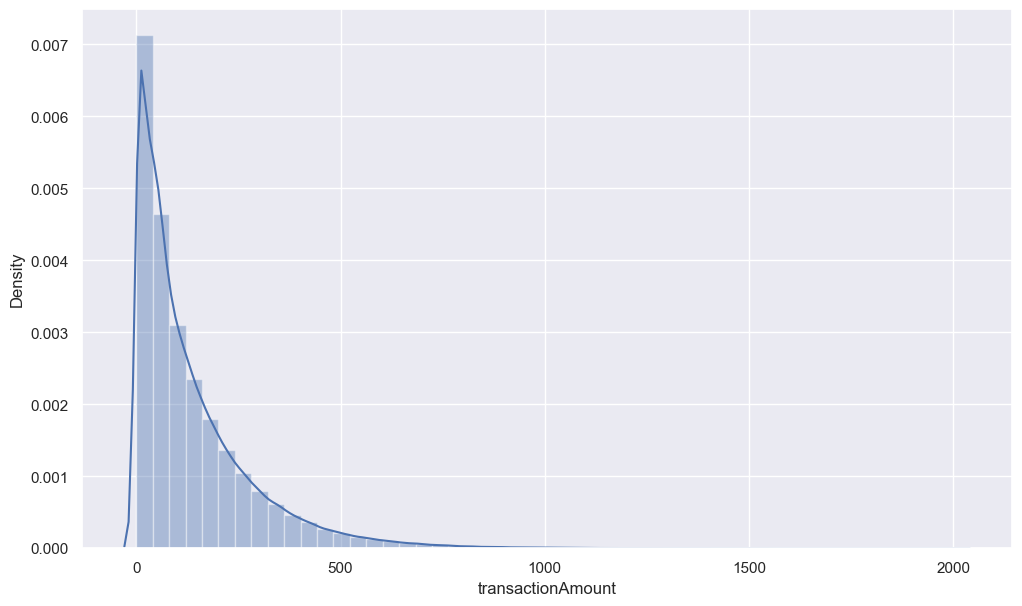

In [60]:
plt.figure(figsize=(12, 7))
sns.distplot(df.transactionAmount)

[Text(0, 0.5, 'Freq')]

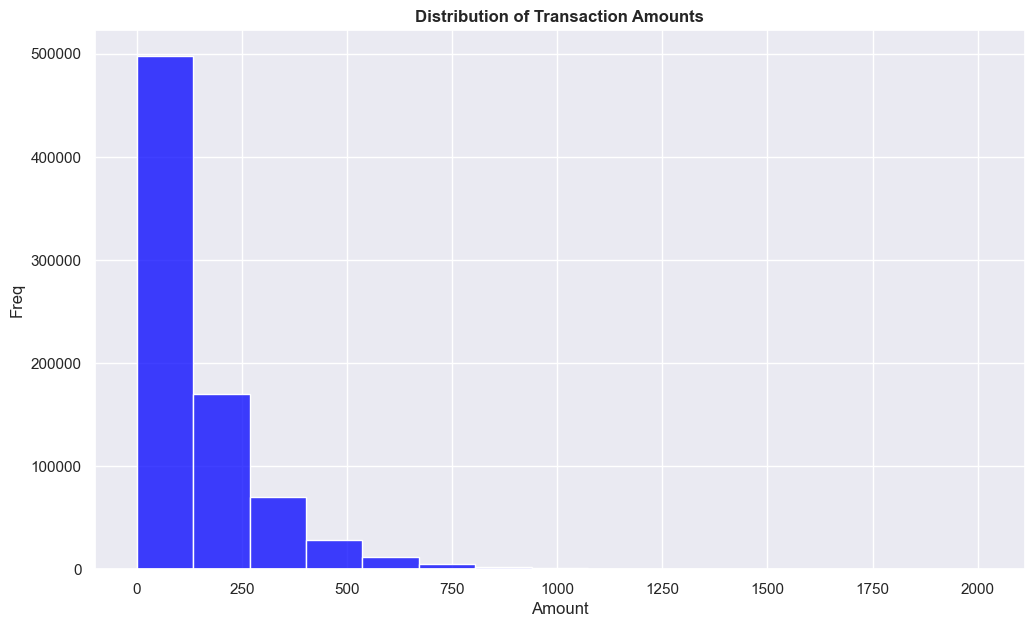

In [64]:
# visualize transaction amounts by using the histogram
sns.set()
plt.figure(figsize=(12, 7))
plt.title('Distribution of Transaction Amounts', weight='bold')
ax=sns.histplot(data=df, x="transactionAmount", color='blue',bins=15)
ax.set(xlabel='Amount')
ax.set(ylabel='Freq')

61% of all transactions are less than specific transaction amount ($125) in the dataset.

In [71]:
z=df[(df.transactionAmount < 125)]
round(len(z)/len(df),2)


0.61

This table indicates how many transactions each account had for each merchant in year 2016.

In [91]:
cust_length=df.groupby(['customerId','merchantName']).count()['Date']
cust_length=pd.DataFrame(cust_length).reset_index()
cust_length.columns=['customerId','merchantName','Count']
#cust_length=cust_length.sort_values(by='Count',ascending=False)
cust_length.head()

,customerId,merchantName,Count
0,100088067,1st BBQ,1
1,100088067,1st Pub,1
2,100088067,1st Sandwitch Bar #758805,1
3,100088067,34th BBQ #412895,1
4,100088067,AMC #191138,1


1) Credit Limit Distribution: Most transactions occur at a credit limit of $5,000, with fewer at higher limits; focus fraud detection on mid-tier users.

2) Fraudulent vs Non-Fraudulent Transactions: Only 12,417 transactions are fraudulent out of 786,363, indicating a highly imbalanced dataset requiring advanced resampling techniques.

3) Merchant Categories: Categories like online retail, fast food, and entertainment dominate, warranting stricter monitoring for potential fraud.

4) Transaction Types: The majority of transactions are purchases, suggesting the need for enhanced verification for routine purchases to prevent fraud.

5) Transaction Amount Distribution: Most transactions are under $250, with a positively skewed distribution, indicating a higher volume of low-value transactions but significant risk in high-value ones.